<a href="https://colab.research.google.com/github/usta-cyber/Deep-Learning-using-python/blob/main/Lab_002_single_Layer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Single layer perceptron implementation

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data.csv to data.csv
User uploaded file "data.csv" with length 125204 bytes


In [4]:
import pandas as pd
data=pd.read_csv('data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Benign 357
Malignanat 212


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


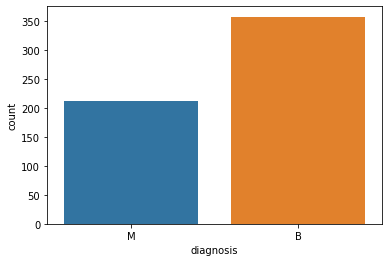

In [5]:
import seaborn as sns
ax=sns.countplot(data['diagnosis'],label='count')
B,M=data['diagnosis'].value_counts()
print('Benign',B)
print('Malignanat',M)

In [6]:
del data['Unnamed: 32']
y=data.iloc[:,1].values
x=data.iloc[:,2:].values

In [7]:
from sklearn.preprocessing import LabelEncoder
LB1=LabelEncoder()
y=LB1.fit_transform(y)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [10]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense


In [12]:
classifier=Sequential()
classifier.add(Dense(1,kernel_initializer='uniform',activation='sigmoid',input_dim=30))


In [13]:
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
print(x_train.shape)
print(y_train.shape)

(512, 30)
(512,)


In [14]:
classifier.fit(x_train,y_train,batch_size=100,epochs=100)

Epoch 1/100
6/6 [==============================] - 1s 3ms/step - loss: 0.6834 - accuracy: 0.6250
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6456 - accuracy: 0.8242
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6113 - accuracy: 0.8848
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 0.5792 - accuracy: 0.9082
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.5496 - accuracy: 0.9199
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.5232 - accuracy: 0.9238
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4990 - accuracy: 0.9219
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.9219
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4571 - accuracy: 0.9238
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4391 - accuracy: 0.9277
Epoch 11/100
6/6 [===========

In [15]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

2/2 [==============================] - 0s 9ms/step


Accuracy= 0.9824561403508771


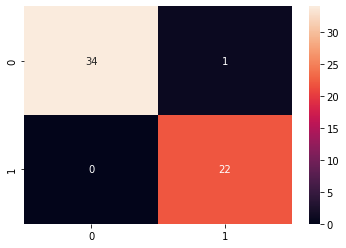

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("Accuracy=",accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.savefig('SLP.png')